In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # 如果 notebook 在 your_project/notebooks 里


from data.market_data import OKXDataFetcher
from score_system.scanner import Scanner
from utils.plots import plot_kline_chart
from strategy.buy_signal import BuySignal
from strategy.sell_signal import SellSignal
import warnings

warnings.filterwarnings("ignore")

In [3]:
okx_data_fetcher = OKXDataFetcher()
scanner = Scanner()

In [4]:
scanner.scan_strong_symbols(volume_threshold=1.0, kline_limit=30, max_symbols=50)

,symbol,score,1h_return(%),volume_change(%),EMA_structure
21,MASK-USDT-SWAP,50.04,3.76,-37.17,bullish
29,TRB-USDT-SWAP,27.01,-3.54,5.44,bearish
36,LDO-USDT-SWAP,26.35,1.22,-48.69,bearish
3,DOGE-USDT-SWAP,25.83,-0.46,-37.06,bearish
6,XRP-USDT-SWAP,25.29,-1.02,-36.87,bearish
37,JTO-USDT-SWAP,25.24,2.21,-69.77,bearish
27,BNB-USDT-SWAP,25.17,0.20,-50.29,bearish
1,BTC-USDT-SWAP,25.13,-0.56,-43.07,bearish
2,SOL-USDT-SWAP,24.69,-1.92,-33.92,bearish
43,ARB-USDT-SWAP,24.58,-1.00,-44.25,bearish


In [5]:
df = okx_data_fetcher.get_kline('MASK-USDT-SWAP',bar='1H')

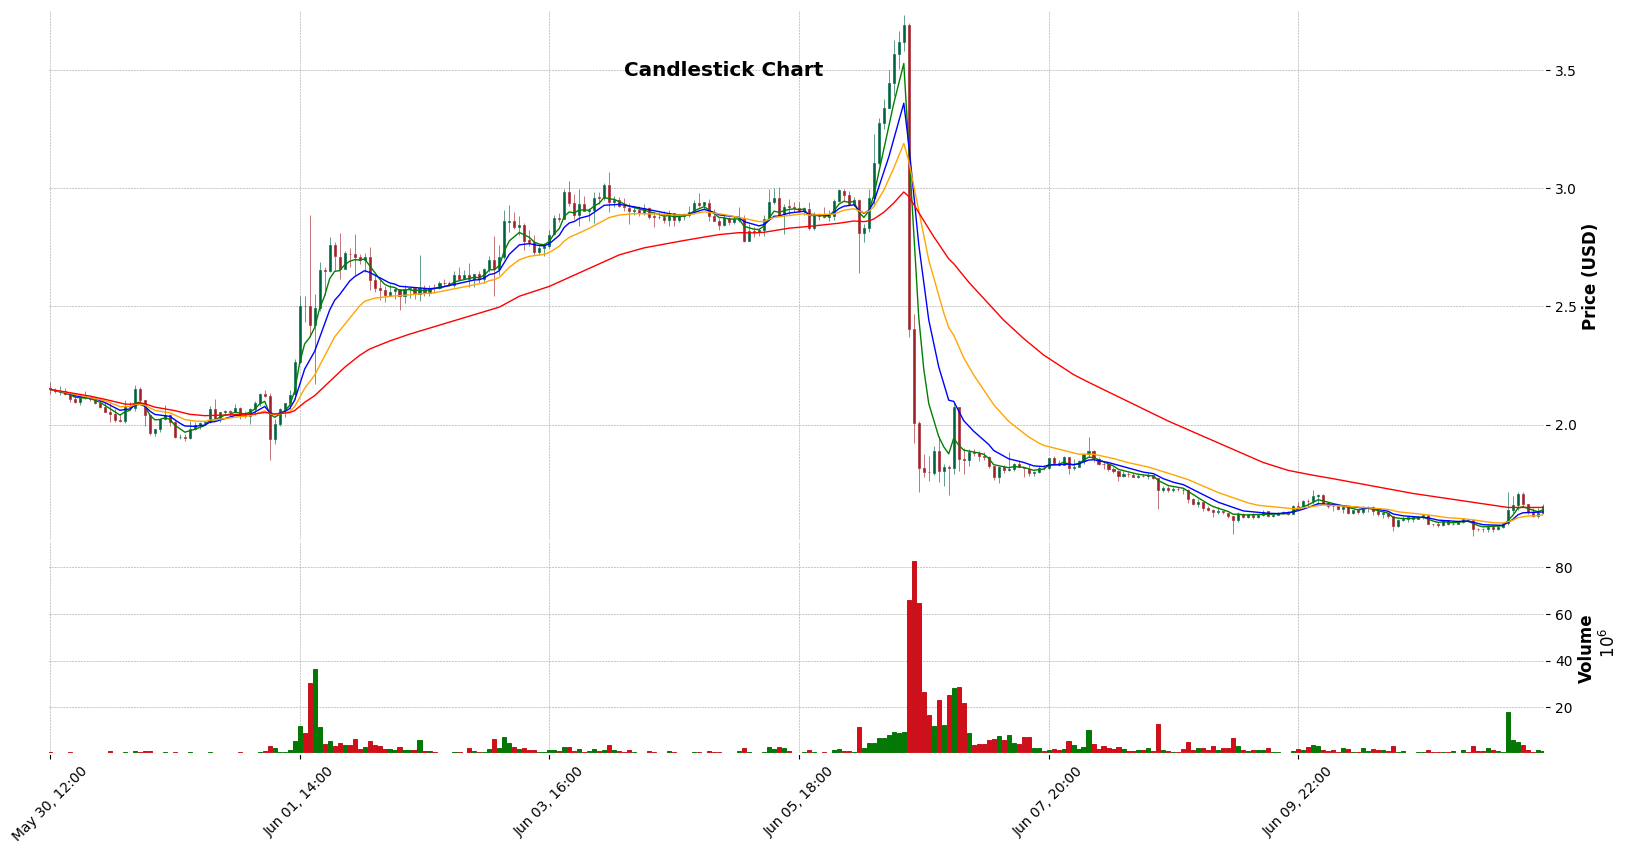

In [6]:
plot_kline_chart(df)

In [7]:
bs = BuySignal()
ss = SellSignal()

df_signal = bs.detect_dizijue_entry(df)
df_signal = ss.detect_exit_signal_full(df_signal)

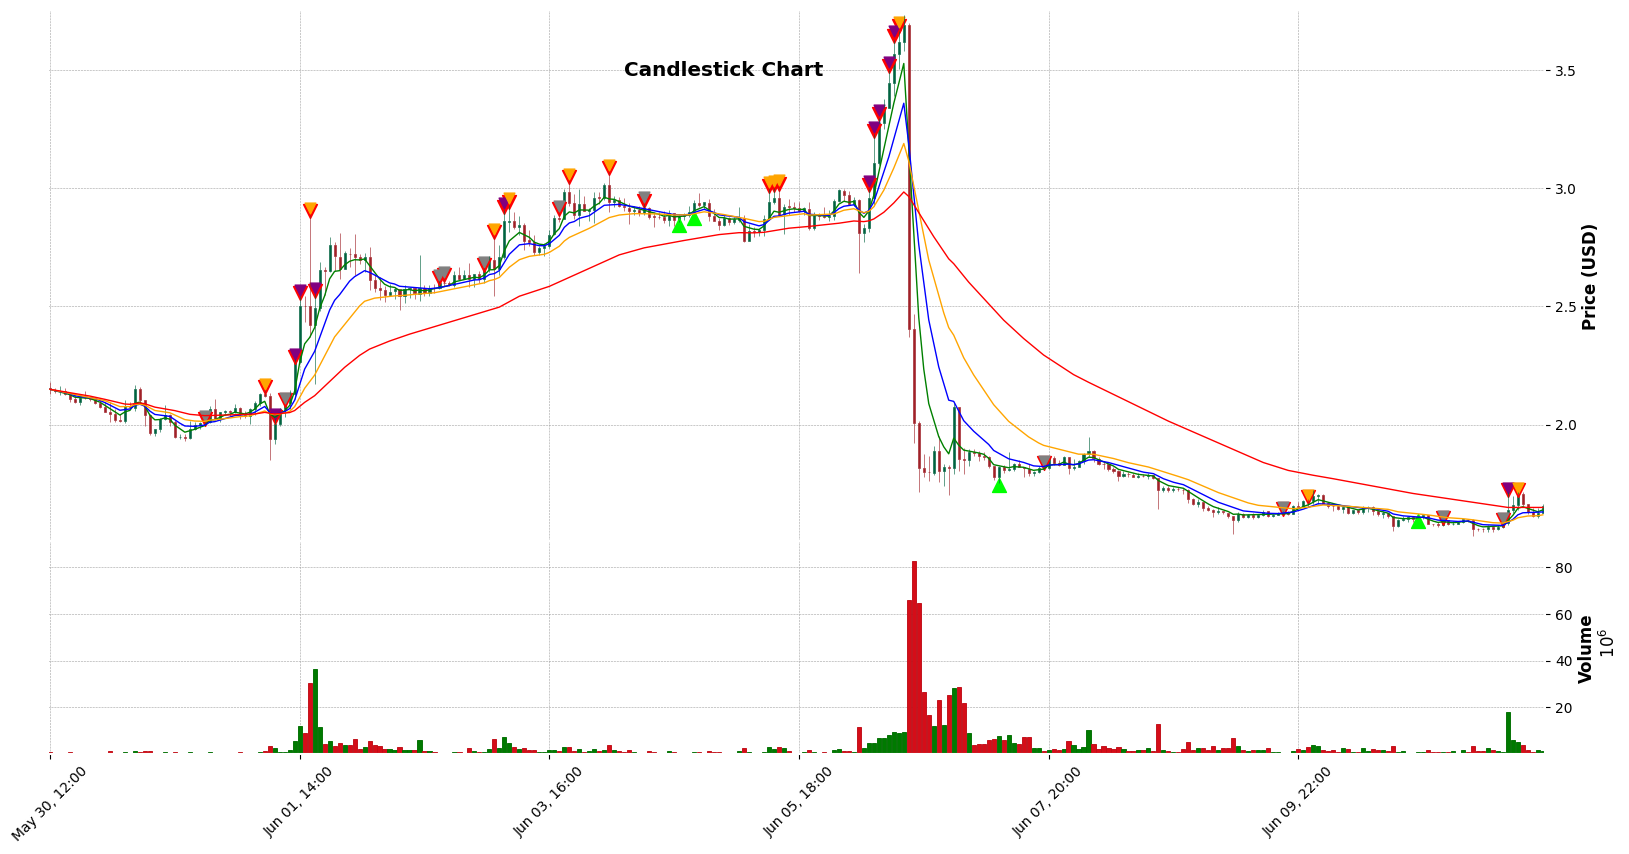

In [8]:
plot_kline_chart(df_signal)

In [10]:
from execution.execution import TradeExecutor

executor = TradeExecutor()
result_df = executor.process_signals(df_signal)


In [11]:
result_df

,timestamp,open,high,low,close,volume,entry_signal,EMA20,exit_signal_1,exit_signal_2,exit_signal_3,exit_signal,avg_volume,unrealized_pnl,realized_pnl,position
0,2025-05-30 12:00:00,2.155,2.181,2.131,2.149,765410.0,False,2.149000,False,False,False,False,NaN,0.0,0.000000,0
1,2025-05-30 13:00:00,2.148,2.156,2.135,2.141,436567.0,False,2.144800,False,False,False,False,NaN,0.0,0.000000,0
2,2025-05-30 14:00:00,2.142,2.163,2.126,2.143,413681.0,False,2.144139,False,False,False,False,NaN,0.0,0.000000,0
3,2025-05-30 15:00:00,2.144,2.155,2.127,2.128,303736.0,False,2.139480,False,False,False,False,NaN,0.0,0.000000,0
4,2025-05-30 16:00:00,2.129,2.132,2.094,2.109,1164875.0,False,2.132107,False,False,False,False,NaN,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2025-06-11 19:00:00,1.704,1.716,1.654,1.665,4117618.0,False,1.611110,False,False,False,False,2827227.95,0.0,3.745408,0
296,2025-06-11 20:00:00,1.664,1.664,1.622,1.629,1870955.0,False,1.612814,False,False,False,False,2819959.90,0.0,3.745408,0
297,2025-06-11 21:00:00,1.628,1.647,1.609,1.612,1152569.0,False,1.612736,False,False,False,False,2824270.70,0.0,3.745408,0
298,2025-06-11 22:00:00,1.611,1.645,1.604,1.625,1911601.0,False,1.613904,False,False,False,False,2873145.40,0.0,3.745408,0
